In [1]:
import csv
from pylab import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Colton/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'power', 'random', 'fft', 'draw_if_interactive', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Import Simulation Data

simTime =[]

count = 0
linenum = 0
simgridlist = []

in_file = open('Trial1-simulationdata-3.csv', 'r')

for line in in_file:
    if linenum == 0:
        stringtime = line.rstrip('\n')
        time = float(stringtime)
        simTime.append(time)
        linenum = 1
    else:
        simgrid = zeros([10,10])
        stringtemps = line.rstrip('\n')
        temps_list = stringtemps.split()
        #simTemps = []
        #simTemps.append(float(item))
        for j in range(10):
            for k in range(10):
                simgrid[j,k] = temps_list[j*10+k]
        simgridlist.append(simgrid)
        linenum = 0


In [3]:
#Import Experimental data

actTime =[]

count1 = 0
linenum1 = 0
actgridlist = []

in_file1 = open('Trial1-Exp-plateplots', 'r')

for line in in_file1:
    if linenum1 == 0:
        stringtime1 = line.rstrip('\n')
        time1 = float(stringtime1)
        actTime.append(time1)
        linenum1 = 1
    else:
        actgrid = zeros([10,10])
        actstringtemps = line.rstrip('\n')
        acttemps_list = actstringtemps.split()
        
        if len(acttemps_list) != 100:
            actTime.pop()
        
        else:
            for j in range(10):
                for k in range(10):
                    actgrid[j,k] = acttemps_list[j*10+k]
            actgridlist.append(actgrid)
        linenum1 = 0



# Creating test plots to see if data imported correctly

In [4]:
xvec = [1.7, 4.7, 7.7, 10.7, 13.7, 16.7, 19.7, 22.7, 25.7, 28.7]
yvec = [1.7, 4.7, 7.7, 10.7, 13.7, 16.7, 19.7, 22.7, 25.7, 28.7]

xgrid, ygrid = meshgrid(xvec, yvec)

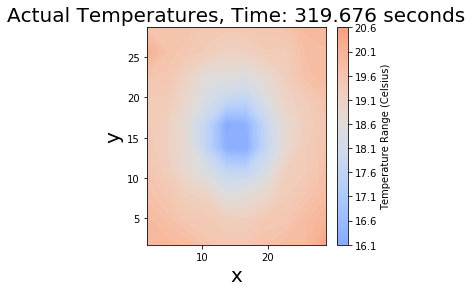

In [5]:
index = -1

fig, ax1 = plt.subplots(1, 1, figsize = plt.figaspect(1))
tempplot = contourf(xgrid, ygrid, actgridlist[index], 50, cmap = cm.coolwarm)


tempbar = colorbar(tempplot)
tempbar.set_label('Temperature Range (Celsius)')
clim(14,23)

ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.set_title('Actual Temperatures, Time: %3.3f seconds' %actTime[index], fontsize=20)

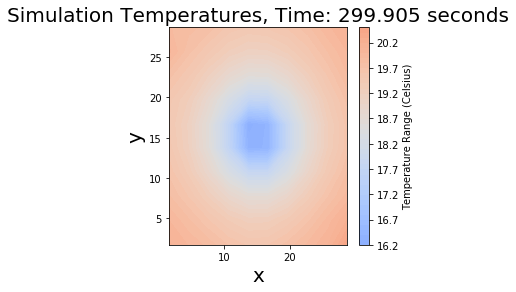

In [6]:
index = -1

fig, ax1 = plt.subplots(1, 1, figsize = plt.figaspect(1))
tempplot = contourf(xgrid, ygrid, simgridlist[index], 50, cmap = cm.coolwarm)


tempbar = colorbar(tempplot)
tempbar.set_label('Temperature Range (Celsius)')
clim(14,23)

ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.set_title('Simulation Temperatures, Time: %3.3f seconds' %simTime[index], fontsize=20)

# Compare by interpolating the simulation plots to have the same time as the actual temp plots. Then plot difference between them or the percent difference.

In [7]:
def differencetempsfunc(interpsimtemps1, actualtemps1):
    
    differencetemps = actualtemps1 - interpsimtemps1

    return differencetemps

In [8]:
def perdifffunc(interpsimtemps2, actualtemps2):
    
    percentdifference = (abs(interpsimtemps2-actualtemps2) / ((interpsimtemps2+actualtemps2)/2)) * 100
    
    return percentdifference

In [9]:
actindex = 1
simindex = 0

actualtime = actTime[actindex]
simulationtime = simTime[simindex]

while simulationtime < actualtime:
    simindex += 1
    simulationtime = simTime[simindex]

#Interpolate the simulation temps to find the temperature of the simulation at the actual time
interpsimtemps = simgridlist[simindex] + ((simgridlist[simindex - 1] - simgridlist[simindex])*(actualtime - simTime[simindex]) / (simTime[simindex - 1]-simTime[simindex]))
actualtemps = actgridlist[actindex]

#Find the differnce between the simulated interpolation temps and the actual temps at the actual time
#Find the percent difference between the simulated interpolation temps and the actual temps at the actual time
difftemps = differencetempsfunc(interpsimtemps, actualtemps)
percentdifference = perdifffunc(interpsimtemps, actualtemps)

(-0.5, 9.5)

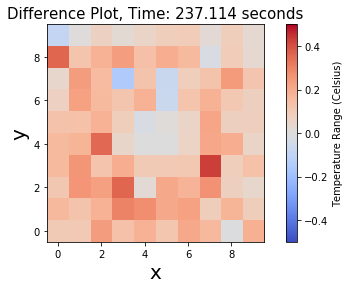

In [16]:
#Plot of the difference of temperatures between the simulated interpolation temps and the actual temps at the actual time

#Can do either a contour plot or a imshow plot

fig, ax1 = plt.subplots(1, 1, figsize = plt.figaspect(.5))
#difftempplot = contourf(xgrid, ygrid, difftemps, 50, cmap = cm.coolwarm)
difftempplot = imshow(difftemps, cmap = cm.coolwarm)

tempbar = colorbar(difftempplot)
tempbar.set_label('Temperature Range (Celsius)')
clim(-.5,.5)

ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.set_title('Difference Plot, Time: %3.3f seconds' %actualtime, fontsize=15)
plt.ylim(-.5,9.5)
plt.xlim(-.5,9.5)

In [34]:
%pylab

from mpl_toolkits.mplot3d import Axes3D

from matplotlib.animation import *

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [33]:
#Creates an animation of difference plots over time.

#fig, ax = plt.subplots(1, 1)
fig = figure(figsize=(5, 5))
#fig = figure(plt.figaspect(.5))


#difftempslist = []
avgdiff = []
avgperdiff = []
difftime = []

for n in range(len(simgridlist)):
    simindex = 0
    
    actualtime = actTime[n]
    simulationtime = simTime[simindex]
    
    while simulationtime < actualtime:
        simindex += 1
        simulationtime = simTime[simindex]
        
    
    difftime.append(simulationtime)
    #Interpolate the simulation temps to find the temperature of the simulation at the actual time
    interpsimtemps = simgridlist[simindex] + ((simgridlist[simindex - 1] - simgridlist[simindex])*(actualtime - simTime[simindex]) / (simTime[simindex - 1]-simTime[simindex]))
    actualtemps = actgridlist[n]

    #Find the differnce between the simulated interpolation temps and the actual temps at the actual time
    #Find the percent difference between the simulated interpolation temps and the actual temps at the actual time
    difftemps = differencetempsfunc(interpsimtemps, actualtemps)
    percentdifference = perdifffunc(interpsimtemps, actualtemps)
    
    avgdiff.append(abs(difftemps.mean()))
    avgperdiff.append(abs(percentdifference.mean()))
    
    # plot the data
    fig.clear()
    

    difftempplot = imshow(difftemps, cmap = cm.coolwarm)
    tempbar = fig.colorbar(difftempplot)
    clim(-.5,.5)
    tempbar
    difftempplot
         
        
        
    plt.xlabel('X index of sensor')
    plt.ylabel('Y index of sensor')
    plt.title('Temperature difference between\nsimulation and experimental temps')
    plt.ylim(-.5,9.5)
    plt.xlim(-.5,9.5)
            
    tempbar.set_label('Temperature Range (Celsius)')
            
    draw()
    plt.pause(.01)


In [39]:
#Creates an animation of difference plots over time.
#Saves a .gif of the animation. Make sure to change Filename on the last line of the code.
#Make sure to write "pip install imageio" in a seperate terminal to be able to import imageio. Same method as getting data from the serial port.


import imageio
images = []

fig = figure(figsize=(5, 5))


#difftempslist = []
avgdiff = []
avgperdiff = []
difftime = []

for n in range(len(simgridlist)):
    simindex = 0
    
    actualtime = actTime[n]
    simulationtime = simTime[simindex]
    
    while simulationtime < actualtime:
        simindex += 1
        simulationtime = simTime[simindex]
        
    
    difftime.append(simulationtime)
    #Interpolate the simulation temps to find the temperature of the simulation at the actual time
    interpsimtemps = simgridlist[simindex] + ((simgridlist[simindex - 1] - simgridlist[simindex])*(actualtime - simTime[simindex]) / (simTime[simindex - 1]-simTime[simindex]))
    actualtemps = actgridlist[n]

    #Find the differnce between the simulated interpolation temps and the actual temps at the actual time
    #Find the percent difference between the simulated interpolation temps and the actual temps at the actual time
    difftemps = differencetempsfunc(interpsimtemps, actualtemps)
    percentdifference = perdifffunc(interpsimtemps, actualtemps)
    
    avgdiff.append(abs(difftemps.mean()))
    avgperdiff.append(abs(percentdifference.mean()))
    
    # plot the data
    fig.clear()
    

    difftempplot = imshow(difftemps, cmap = cm.coolwarm)
    tempbar = fig.colorbar(difftempplot)
    clim(-.5,.5)
    tempbar
    difftempplot
         
        
        
    plt.xlabel('X index of sensor')
    plt.ylabel('Y index of sensor')
    plt.title('Temperature difference between\nsimulation and experimental temps')
    plt.ylim(-.5,9.5)
    plt.xlim(-.5,9.5)
            
    tempbar.set_label('Temperature Range (Celsius)')
            
    
    plotpicture = plt.savefig('test.png')


    images.append(imageio.imread('test.png'))

    
    
    draw()
    plt.pause(.01)

imageio.mimsave('SenSemTest-0.gif', images)

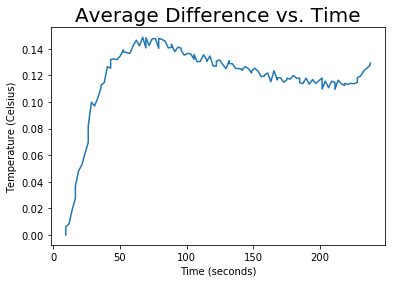

In [55]:
#Plots the average difference in temperature vs. time.

plt.plot(difftime, avgdiff)

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (Celsius)')
#plt.title('Avg. Plate Temp. Difference between Simulation and Experimental Data', fontsize=20)
plt.title('Average Difference vs. Time', fontsize=20)

(-0.5, 9.5)

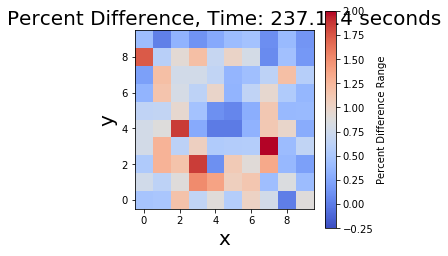

In [47]:
#Plot of the percent difference of temperatures between the simulated interpolation temps and the actual temps at the actual time

fig, ax1 = plt.subplots(1, 1, figsize = plt.figaspect(1))
#percentdifftempplot = contourf(xgrid, ygrid, percentdifference, 50, cmap = cm.coolwarm)
percentdifftempplot = imshow(percentdifference, cmap = cm.coolwarm)

tempbar = colorbar(percentdifftempplot)
tempbar.set_label('Percent Difference Range')
clim(-.25,2)

ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.set_title('Percent Difference, Time: %3.3f seconds' %actualtime, fontsize=20)
plt.ylim(-.5,9.5)
plt.xlim(-.5,9.5)

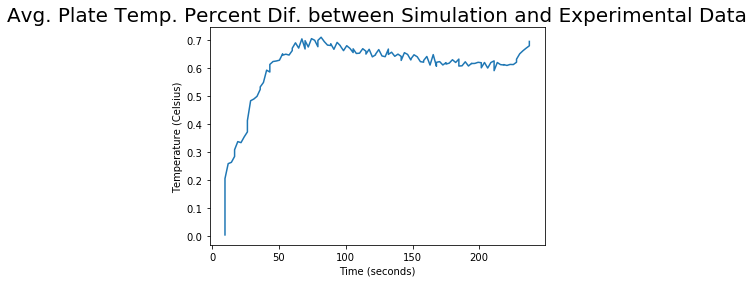

In [48]:
#Plots the percent difference in temperature vs. time.

plt.plot(difftime, avgperdiff)

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (Celsius)')
plt.title('Avg. Plate Temp. Percent Dif. between Simulation and Experimental Data', fontsize=20)

# Make a Temp vs. Time line plot for one point on each of the data sets.

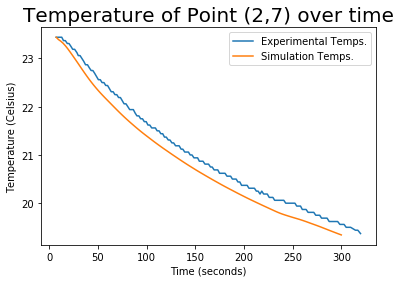

In [49]:
#sensor index
xindex = 2
yindex = 7

actpointtemplist = []
for matrix1 in actgridlist:
    actpointtemplist.append(matrix1[xindex, yindex])
        
simpointtemplist = []
for matrix2 in simgridlist:
    simpointtemplist.append(matrix2[xindex, yindex])

plt.plot(actTime, actpointtemplist, label='Experimental Temps.')
plt.plot(simTime, simpointtemplist, label='Simulation Temps.')
#plt.plot(simTime2, simpointtemplist, label='Simulation Temps.')

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature of Point (%.0f,%.0f) over time'%(xindex, yindex), fontsize=20)
legend()